In [1]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics

<h3>Prueba de la clase EstrategiaParticionado<h3>

In [2]:
k = 3
p = 0.3
nEjecuciones = 3

n_datos = 10

dataset = Datos("tic-tac-toe.data")

#Cambio estrategia particionado comentar

Se prueba primero ValidacionSimple. Para visualizar mejor la partición, solo se usan los n_datos = 10 primeros datos del dataset. En general, el parametro n_datos debería ser igual al número de datos en el dataset. 

In [3]:

estrategia_simple = ValidacionSimple(p, nEjecuciones)
particiones_simple = estrategia_simple.creaParticiones(n_datos)

for particion in particiones_simple:
    datos_test = dataset.extraeDatos(particion.indicesTest)
    datos_train = dataset.extraeDatos(particion.indicesTrain)
    print("Test:", str(datos_test))
    print("Train:", str(datos_train))
    print()
    

Test: [array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o', 'positive'],
      dtype=object)]
Train: [array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'b', 'o', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'b', 'b', 'positive'],
      dtype=object)]

Test: [array(['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o',

Prueba de ValidacionCruzada con parametro k = 3. Igual que en el caso anterior, para facilitar la visualización solose usan los 10 primeros datos (n_datos). 

In [4]:
estrategia_cruzada = ValidacionCruzada(k)
particiones_cruzada = estrategia_cruzada.creaParticiones(n_datos)

for particion in particiones_cruzada:

    datos_test = dataset.extraeDatos(particion.indicesTest)
    datos_train = dataset.extraeDatos(particion.indicesTrain)
    print("Test:", str(datos_test))
    print("Train:", str(datos_train))
    print()

Test: [array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'b', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'o', 'b', 'positive'],
      dtype=object)]
Train: [array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'b', 'o', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'b', 'o', 'positive'],
      dtype=object)]

Test: [array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o',

<h3>Prueba de la clase Clasificacion<h3>

Primero se necesita obtener los datos en un formato correcto.

In [5]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

Después, crear las particiones datostrain y datostest. En este caso de prueba utilizaremos validacionSimple con nEjecuciones = 1.

In [6]:
p = 0.2
vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=0)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)

Ahora, se entrena el modelo utilizando el conjunto datostrain

In [7]:
cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

Y, por último se predice la clase para datostest utilizando los porcentajes obtenidos. 

In [8]:
prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

Mostramos por pantalla el resultado obtenido:

In [9]:
cont = 0
for i in range(len(datostest)):
    if datostest[i][-1] == prediccion[i]:
        cont += 1

print(cont, len(datostest), cont/len(datostest))

132 192 0.6875


In [10]:
print(1-cl.error(datostest, prediccion))

0.6875


Hemos obtenido aproximadamente un 74% de aciertos en este dataset y particion. Vamos a probar ahora los datos "german.data" haciendo las mismas operaciones que en el caso anterior.

In [11]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  


In [12]:
p = 0.1
vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=0)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)

In [13]:
cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

In [14]:
prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

In [15]:
cont = 0
for i in range(len(datostest)):
    if datostest[i][-1] == prediccion[i]:
        cont += 1

print(cont, len(datostest), cont/len(datostest))

72 100 0.72


Igual que en el caso anterior, el modelo acierta en aproximadamente 70% de los casos. 

Una vez hechas las pruebas, vamos a analizar la precisión media de los clasificadores.

1. Estrategia de particionado: Validación Simple


Parámetros: nEjecuciones = 10, p = 0.2, archivo: 'tic-tac-toe.data'

In [16]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

In [17]:
p = 0.2
nEjecuciones = 10

vs = ValidacionSimple(p, nEjecuciones)

In [18]:
cl = ClasificadorNaiveBayes()
errores_vs_a1 = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, seed=0)

Calculamos la media y la desviación tipica

In [19]:
media_vs_a1 = np.mean(errores_vs_a1)
desv_vs_a1 = np.std(errores_vs_a1)

print(media_vs_a1, desv_vs_a1)

0.3026041666666666 0.03700849775727191


Hacemos lo mismo para otro conjunto de datos

In [20]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

In [21]:
p = 0.2
nEjecuciones = 10

vs = ValidacionSimple(p, nEjecuciones)

In [22]:
cl = ClasificadorNaiveBayes()
errores_vs_a2 = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, seed=0)

In [23]:
media_vs_a2 = np.mean(errores_vs_a2)
desv_vs_a2 = np.std(errores_vs_a2)

print(media_vs_a2, desv_vs_a2)

0.2545 0.025927784324928344


Y ahora, para la validación cruzada con k = 10

tic-tac-toe.data

In [24]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

k = 10
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a1 = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, seed=0)

media_vc_a1 = np.mean(errores_vc_a1)
desv_vc_a1 = np.std(errores_vc_a1)

print(media_vc_a1, desv_vc_a1)

0.3042105263157895 0.05058111063887985


german.data

In [25]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

k = 10
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a2 = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, seed=0)

media_vc_a2 = np.mean(errores_vc_a2)
desv_vc_a2 = np.std(errores_vc_a2)

print(media_vc_a2, desv_vc_a2)

0.242 0.0342928563989645


Imprimimos todos los datos juntos:

In [26]:
print('\ttic-tac-toe\t\tgerman')
print('VS\t(', round(media_vs_a1, 3), round(desv_vs_a1,3), ')\t\t(', round(media_vs_a2, 3), round(desv_vs_a2,3), ')')
print('VC\t(', round(media_vc_a1, 3), round(desv_vc_a1,3), ')\t\t(', round(media_vc_a2, 3), round(desv_vc_a2,3), ')')

	tic-tac-toe		german
VS	( 0.303 0.037 )		( 0.254 0.026 )
VC	( 0.304 0.051 )		( 0.242 0.034 )


No se aprecia una gran diferencia entre validación simple y validación cruzada, de hecho las medias son prácticamente iguales, aunque la desviación tipica es algo mejor en el caso de validación simple. 

Y, respecto a la diferencia entre ambos archivos, parece que la predicción para german.data es algo más precisa. 

En ambos casos, la desviación típica es pequeña, por tanto cabe esperar que el error cometido se encuentre cerca de la media calculada. 

<h3>Scikit-Learn</h3>

En el caso de Scikit-Learn, no hay una función que te permita tratar ciertos datosz como categóricos y ciertos datos del mismo dataset como continuos. Por tanto, utilizaremos MultinomialNB para el caso de datos categóricos (tic-tac-toe.data) y GaussianNB para el caso de que haya algún dato continuo (german.data).

Primero empezamos con las pruebas de validación simple y con tic-tac-toe.data. Transformamos los datos al formato adecuado y realizamos la partición:

In [27]:
archivo = 'tic-tac-toe.data'
p = 0.2
seed = 123

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

Procedemos con la clasificación. Haremos una prueba sin Laplace (alpha=0) y otra con Laplace (alpha=1):

In [28]:
mnb0 = MultinomialNB(alpha=0)

mnb0.fit(X_train, y_train)

y_pred0 = mnb0.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred0))


Accuracy: 0.6510416666666666


c:\users\elena\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [29]:
mnb1 = MultinomialNB(alpha=1)

mnb1.fit(X_train, y_train)

y_pred1 = mnb1.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6510416666666666


Observamos que no hay diferencia entre haber utilizado Laplace y no haberlo utilizado. Puede que en este caso haya sido así, pero en general es buena idea utilizar Laplace, porque no sabes como es el dataset, y podría ocurrir que alguna de las probabilidades condicionadas fuesen 0.

Procedemos a realizar la misma prueba, pero esta vez utilizando validación cruzada:

In [30]:
archivo = 'tic-tac-toe.data'
p = 0.2
seed = 123
k = 3

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')


In [31]:
mnb2 = MultinomialNB(alpha=0)

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    mnb2.fit(X_train, y_train)

    y_pred2 = mnb2.predict(X_test)


    print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.63125
Accuracy: 0.664576802507837
Accuracy: 0.6833855799373041


c:\users\elena\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\elena\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\elena\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [32]:
mnb3 = MultinomialNB(alpha=1)

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    mnb3.fit(X_train, y_train)

    y_pred3 = mnb3.predict(X_test)


    print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.63125
Accuracy: 0.664576802507837
Accuracy: 0.6833855799373041


De nuevo, observamos que Laplace no influye

Pasamos a utilizar el dataset german.data y repetimos las mismas pruebas:

In [33]:
archivo = 'german.data'
p = 0.2
seed = 123

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

In [35]:
gnb0 = GaussianNB()

gnb0.fit(X_train, y_train)

y_pred4 = gnb0.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))


Accuracy: 0.75


In [36]:
gnb1 = GaussianNB()

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    gnb1.fit(X_train, y_train)

    y_pred5 = gnb1.predict(X_test)


    print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7604790419161677
Accuracy: 0.7087087087087087
Accuracy: 0.7177177177177178


<h3>Evaluación de hipótesis mediante Análisis ROC</h3>

Vamos a realizar este análisis para cada tipo de validación y para cada dataset. Primero, comenzaremos con tic-tac-toe.data y validación simple.

In [37]:
p = 0.2
seed = 0
k = 3

def get_matriz_conf_data(conf_data, clases, ocurrencias_clases):
    
    matriz_conf = np.zeros((2, 2))
    matriz_conf[0][0] = ocurrencias_clases[clases[1]]
    matriz_conf[0][1] = ocurrencias_clases[clases[0]]
    tpr = np.empty(len(datostest))
    fpr = np.empty(len(datostest))

    for i in range(len(conf_data)):
        if conf_data[i][1] == clases[0]: # Dato negativo
            matriz_conf[1][1] += 1 #TN
            matriz_conf[0][1] -= 1 #FP

        else: # Dato positivo
            matriz_conf[1][0] += 1 #FN
            matriz_conf[0][0] -= 1 #TP


        tpr[i] = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0])

        fpr[i] = matriz_conf[0][1]/(matriz_conf[0][1]+matriz_conf[1][1])
    
    return matriz_conf, tpr, fpr

In [38]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


Construimos la matriz de confusión. Como anotación, se asume que la clase negativa es la de menor valor y la positiva la de mayor valor.

In [39]:
matriz_conf_tic_simple, tpr_tic_simple, fpr_tic_simple = get_matriz_conf_data(conf_data, clases, counts)

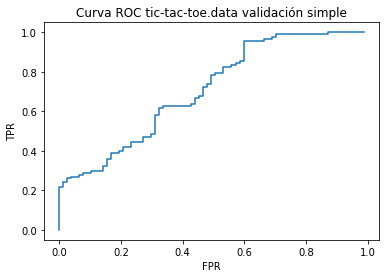

In [40]:
plt.figure()
plt.plot(fpr_tic_simple, tpr_tic_simple)
plt.title("Curva ROC tic-tac-toe.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Ahora para tic-tac-toe.data con validación cruzada con 3 folds:

In [41]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_tic_cruzada = []
tpr_tic_cruzada_lista = []
fpr_tic_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)


    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    matriz_conf_tic_cruzada, tpr_tic_cruzada, fpr_tic_cruzada = get_matriz_conf_data(conf_data, clases, counts)
    matrices_conf_tic_cruzada.append(matriz_conf_tic_cruzada)
    tpr_tic_cruzada_lista.append(tpr_tic_cruzada)
    fpr_tic_cruzada_lista.append(fpr_tic_cruzada)

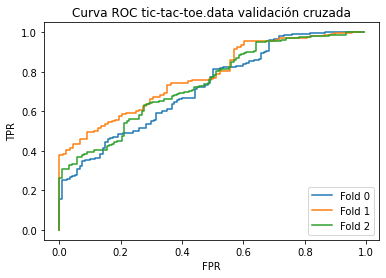

In [42]:
plt.figure()

for i in range(k):
    plt.plot(fpr_tic_cruzada_lista[i], tpr_tic_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC tic-tac-toe.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

german.data y validacion simple:

In [43]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [44]:
matriz_conf_german_simple, tpr_german_simple, fpr_german_simple = get_matriz_conf_data(conf_data, clases, counts)

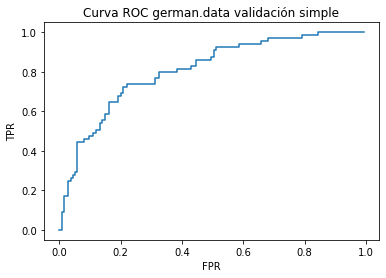

In [45]:
plt.figure()
plt.plot(fpr_german_simple, tpr_german_simple)
plt.title("Curva ROC german.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_german_cruzada = []
tpr_german_cruzada_lista = []
fpr_german_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)

    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    matriz_conf_german_cruzada, tpr_german_cruzada, fpr_german_cruzada = get_matriz_conf_data(conf_data, clases, counts)
    matrices_conf_german_cruzada.append(matriz_conf_german_cruzada)
    tpr_german_cruzada_lista.append(tpr_german_cruzada)
    fpr_german_cruzada_lista.append(fpr_german_cruzada)

In [ ]:
plt.figure()

for i in range(k):
    plt.plot(fpr_german_cruzada_lista[i], tpr_german_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC german.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

<h4> Comentarios respecto a modificaciones en el diseño de clases <h4>